### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

Загрузите "Boston House Prices dataset" из встроенных наборов
данных библиотеки sklearn.

In [78]:
from sklearn.datasets import load_boston
boston = load_boston()

Создайте датафреймы X и y из этих данных.

In [79]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [82]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


Постройте диаграмму рассеяния на этих данных.

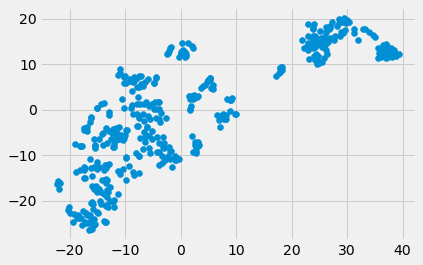

In [83]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [84]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [85]:
labels_train = kmeans.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

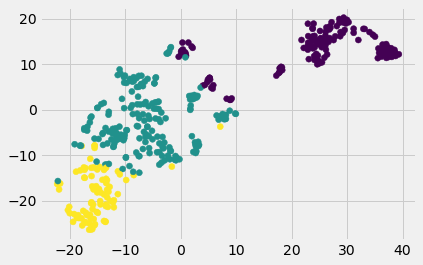

In [86]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [87]:
print('price Кластер 0: {}'.format(y_train[labels_train == 0].mean()))
print('price Кластер 1: {}'.format(y_train[labels_train == 1].mean()))
print('price Кластер 2: {}'.format(y_train[labels_train == 2].mean()))

print('CRIM Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('CRIM Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('CRIM Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

price Кластер 0: 16.1796875
price Кластер 1: 24.99473684210526
price Кластер 2: 27.78837209302326
CRIM Кластер 0: 10.7152190625
CRIM Кластер 1: 0.42216668421052633
CRIM Кластер 2: 0.07356558139534884


### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

y_test_pred = lr.predict(X_test_scaled)

r2_score(y_test, y_test_pred)

0.6687594935356321

In [89]:
labels_test = kmeans.predict(X_test_scaled)
lr.fit(X_train_scaled.loc[labels_train == 0], y_train[labels_train == 0])

y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test == 0])

r2_score(y_test[labels_test == 0], y_test_pred_0)

0.523218929774001

In [90]:
lr.fit(X_train_scaled.loc[labels_train == 1], y_train[labels_train == 1])

y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test == 1])

r2_score(y_test[labels_test == 1], y_test_pred_1)

0.721654203958106

In [91]:
lr.fit(X_train_scaled.loc[labels_train == 2], y_train[labels_train == 2])

y_test_pred_2 = lr.predict(X_test_scaled.loc[labels_test == 2])

r2_score(y_test[labels_test == 2], y_test_pred_2)

0.9155161972050821

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [92]:
y_test_all = np.hstack([y_test[labels_test == 0], y_test[labels_test == 1], y_test[labels_test == 2]])
y_test_pred_all = np.hstack([y_test_pred_0, y_test_pred_1, y_test_pred_2])

r2_score(y_test_all, y_test_pred_all)

0.7955562506152839

In [93]:
print('price Кластер 0: {}'.format(y_test[labels_test == 0].mean()))
print('price Кластер 1: {}'.format(y_test[labels_test == 1].mean()))
print('price Кластер 2: {}'.format(y_test[labels_test == 2].mean()))

print('CRIM Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('CRIM Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('CRIM Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

price Кластер 0: 16.43714285714286
price Кластер 1: 21.860784313725492
price Кластер 2: 31.35
CRIM Кластер 0: 10.165531142857143
CRIM Кластер 1: 0.2660788235294118
CRIM Кластер 2: 0.06206
